In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('labeled_broncos_data.csv')

In [3]:
# Map 'Win' to 1 and 'Loss' to 0
df['Result_Label'] = df['Result_Label'].map({'Win': 1, 'Loss': 0})

In [4]:
# Step 2: Separate completed games and future games
completed_games = df.dropna(subset=['Result_Label'])
future_games = df[df['Result_Label'].isna()]

In [5]:
# Step 3: Encode Result_Label to int (if not already)
completed_games['Result_Label'] = completed_games['Result_Label'].astype(int)

C:\Users\Jeevan\AppData\Local\Temp\ipykernel_11176\84870330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_games['Result_Label'] = completed_games['Result_Label'].astype(int)


In [6]:
# Step 4: Define columns to drop (non-feature columns)
drop_cols = ['Match Number', 'Round Number', 'Date', 'Location', 
             'Home Team', 'Away Team', 'Result', 'Team', 'Opponent', 'Result_Label']

In [7]:
# Step 5: Prepare features and target for training
X = completed_games.drop(columns=drop_cols)
y = completed_games['Result_Label']

In [8]:
# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 7: Train XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

c:\Users\Jeevan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:38:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
# Step 8: Evaluate on test set
y_pred = model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



In [11]:
# Step 9: Prepare future games features for prediction
X_future = future_games.drop(columns=drop_cols)

In [12]:
# Step 10: Predict future games
future_preds = model.predict(X_future)

In [13]:
# Step 11: Add predictions to future_games DataFrame
future_games = future_games.copy()
future_games['Predicted_Result'] = ['Win' if p == 1 else 'Loss' for p in future_preds]

In [14]:
# Step 12: Display predictions for future games
print(future_games[['Match Number', 'Team', 'Opponent', 'Predicted_Result']])

    Match Number              Team                       Opponent  \
14           124  Brisbane Broncos                       Warriors   
15           129  Brisbane Broncos  Canterbury-Bankstown Bulldogs   
16           140  Brisbane Broncos              Gold Coast Titans   
17           151  Brisbane Broncos                Parramatta Eels   
18           159  Brisbane Broncos         South Sydney Rabbitohs   
19           165  Brisbane Broncos                Melbourne Storm   
20           177  Brisbane Broncos                   The Dolphins   
21           187  Brisbane Broncos              Newcastle Knights   
22           194  Brisbane Broncos       North Queensland Cowboys   
23           197  Brisbane Broncos                Melbourne Storm   

   Predicted_Result  
14             Loss  
15              Win  
16              Win  
17              Win  
18              Win  
19              Win  
20              Win  
21             Loss  
22              Win  
23              Win 

In [15]:
print("Features used in model:")
print(model.get_booster().feature_names)


Features used in model:
['team_premierships', 'team_minor_premierships', 'team_runner_up', 'team_total_wins', 'team_total_losses', 'team_win_percentage', 'team_points_scored', 'team_points_conceded', 'team_completion_rate', 'team_tackle_efficiency', 'team_avg_points_scored', 'team_avg_points_conceded', 'team_avg_play_the_ball_speed', 'away_premierships', 'away_minor_premierships', 'away_runner_up', 'away_total_wins', 'away_total_losses', 'away_win_percentage', 'away_points_scored', 'away_points_conceded', 'away_completion_rate', 'away_tackle_efficiency', 'away_avg_points_scored', 'away_avg_points_conceded', 'away_avg_play_the_ball_speed']


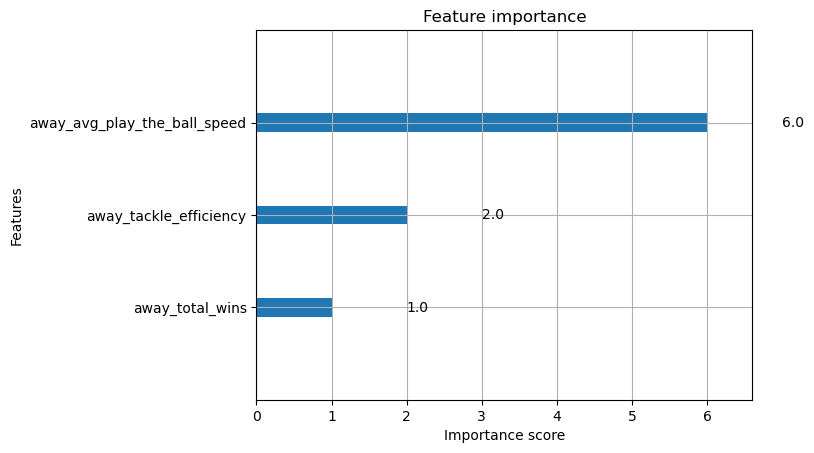

In [16]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


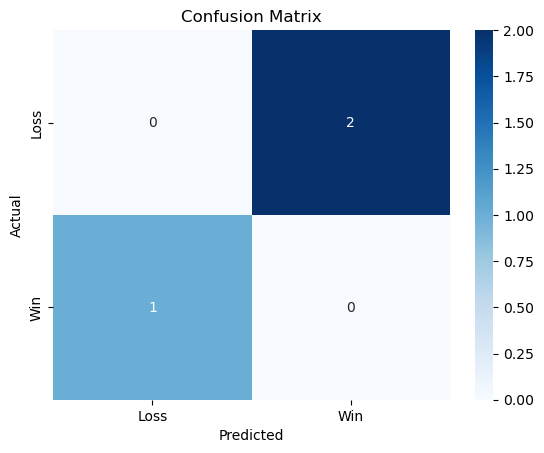

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
